<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

<img src="Figures/MNIST-Handwritten digits.png" height=450 width=450/>

#### TensorFlow Installation

In [1]:
#!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
print(tf.version.VERSION)

2.9.1


#### Import the necessary libraries

In [74]:
import tensorflow as tf 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [75]:
K.backend()

'tensorflow'

#### Load and split MNIST for training and testing

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#### Explore the dataset

Keras Handwritten digit MNIST dataset

<img src="Figures/dataset.png" height=450 width=450 />

In [7]:
len(X_train)

60000

In [8]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

It would be something like this

<img src='Figures/pixel.png' />

In [10]:
X_train[0]
# Displays 28 x 28 pixels in 2D array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

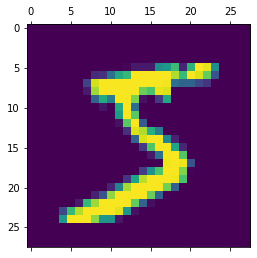

In [11]:
plt.matshow(X_train[0])

In [12]:
y_train[0]
# Label for the above input image

5

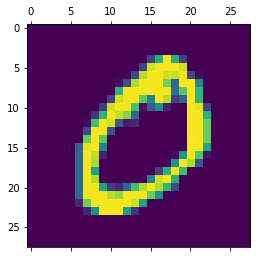

In [13]:
plt.matshow(X_train[1])

In [14]:
y_train[1]

0

In [15]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

#### Flattening

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train.shape[1]

28

You must convert this into 6000, 784

In [18]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_train_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
X_train_flattened.shape

(60000, 784)

In [20]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [21]:
X_test_flattened = X_test.reshape(len(X_test),  28 * 28)
X_test_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

#### Normalize the input dataset

In [22]:
X_train_normalized = X_train_flattened / 255

In [26]:
X_train_normalized[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [27]:
X_test_normalized = X_test_flattened / 255

### NN model with one hidden layer

<img src="Figures/model2.png" height=400 width=400 />

###### Model configuration

In [28]:
model = keras.Sequential([
    # input layer 784 neurons to first hidden layer with 64 neurons
    keras.layers.Dense(64, input_shape = (784,), activation='relu'), 
    # Previous hidden layer to output layer
    keras.layers.Dense(10, activation='sigmoid')    
])

##### Model summary

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Layer details

In [30]:
model.layers

In [31]:
len(model.layers)

2

In [32]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

###### Training the model

In [33]:
model.fit(X_train_normalized, y_train, epochs = 100, verbose=1, batch_size=60000)

Epoch 1/100
1/1 [==============================] - 1s 810ms/step - loss: 2.3353 - accuracy: 0.1069
Epoch 2/100
1/1 [==============================] - 0s 149ms/step - loss: 2.2355 - accuracy: 0.1630
Epoch 3/100
1/1 [==============================] - 0s 145ms/step - loss: 2.1465 - accuracy: 0.2424
Epoch 4/100
1/1 [==============================] - 0s 151ms/step - loss: 2.0640 - accuracy: 0.3382
Epoch 5/100
1/1 [==============================] - 0s 145ms/step - loss: 1.9851 - accuracy: 0.4275
Epoch 6/100
1/1 [==============================] - 0s 180ms/step - loss: 1.9077 - accuracy: 0.4993
Epoch 7/100
1/1 [==============================] - 0s 143ms/step - loss: 1.8310 - accuracy: 0.5543
Epoch 8/100
1/1 [==============================] - 0s 152ms/step - loss: 1.7547 - accuracy: 0.5954
Epoch 9/100
1/1 [==============================] - 0s 180ms/step - loss: 1.6788 - accuracy: 0.6306
Epoch 10/100
1/1 [==============================] - 0s 143ms/step - loss: 1.6040 - accuracy: 0.6599
Epoch 11/

1/1 [==============================] - 0s 161ms/step - loss: 0.3335 - accuracy: 0.9089
Epoch 84/100
1/1 [==============================] - 0s 143ms/step - loss: 0.3316 - accuracy: 0.9092
Epoch 85/100
1/1 [==============================] - 0s 154ms/step - loss: 0.3297 - accuracy: 0.9095
Epoch 86/100
1/1 [==============================] - 0s 149ms/step - loss: 0.3279 - accuracy: 0.9099
Epoch 87/100
1/1 [==============================] - 0s 129ms/step - loss: 0.3261 - accuracy: 0.9103
Epoch 88/100
1/1 [==============================] - 0s 146ms/step - loss: 0.3244 - accuracy: 0.9107
Epoch 89/100
1/1 [==============================] - 0s 128ms/step - loss: 0.3227 - accuracy: 0.9111
Epoch 90/100
1/1 [==============================] - 0s 137ms/step - loss: 0.3210 - accuracy: 0.9116
Epoch 91/100
1/1 [==============================] - 0s 147ms/step - loss: 0.3194 - accuracy: 0.9118
Epoch 92/100
1/1 [==============================] - 0s 147ms/step - loss: 0.3178 - accuracy: 0.9123
Epoch 93/100


##### Printing the weights

Getting weights and bias values after the training stage

In [34]:
original_weights = model.get_weights()
# convert list to array
weights = np.array(original_weights)
weights

<ipython-input-34-4f8fb3d8cc7f>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights = np.array(original_weights)


array([array([[ 0.0125315 , -0.08046556, -0.05301911, ..., -0.05446045,
               -0.05927167, -0.06994961],
              [-0.00728518,  0.00892169, -0.05702665, ...,  0.0300811 ,
                0.02031308, -0.06408572],
              [ 0.07090462, -0.0764684 ,  0.02990752, ..., -0.08081014,
                0.03539871,  0.06823724],
              ...,
              [-0.05701805, -0.04082162,  0.03850032, ..., -0.04733499,
               -0.03839022,  0.07370178],
              [ 0.02287386,  0.01596382,  0.03305624, ...,  0.06807341,
               -0.06486342,  0.03163679],
              [ 0.02960955,  0.00081019,  0.03200337, ...,  0.07533667,
               -0.07127538, -0.04698471]], dtype=float32)              ,
       array([ 0.04504513,  0.05421753,  0.02446254,  0.02246043,  0.04432507,
               0.0028891 ,  0.01592813,  0.01983657,  0.05123106,  0.05064083,
               0.05798962,  0.00722412,  0.06186702,  0.02966474,  0.07403334,
               0.04057912,  0

In [35]:
weights.shape

(4,)

In [36]:
# weights of first layer
weights[0].shape

(784, 64)

In [37]:
# bias of first layer
weights[1].shape

(64,)

In [38]:
# weights of second layer
weights[2].shape

(64, 10)

In [39]:
# bias of second layer
weights[3].shape

(10,)

In [40]:
weights[0] 

array([[ 0.0125315 , -0.08046556, -0.05301911, ..., -0.05446045,
        -0.05927167, -0.06994961],
       [-0.00728518,  0.00892169, -0.05702665, ...,  0.0300811 ,
         0.02031308, -0.06408572],
       [ 0.07090462, -0.0764684 ,  0.02990752, ..., -0.08081014,
         0.03539871,  0.06823724],
       ...,
       [-0.05701805, -0.04082162,  0.03850032, ..., -0.04733499,
        -0.03839022,  0.07370178],
       [ 0.02287386,  0.01596382,  0.03305624, ...,  0.06807341,
        -0.06486342,  0.03163679],
       [ 0.02960955,  0.00081019,  0.03200337, ...,  0.07533667,
        -0.07127538, -0.04698471]], dtype=float32)

In [41]:
model.layers[0].get_weights()
# displays the weights and biases of first layer

[array([[ 0.0125315 , -0.08046556, -0.05301911, ..., -0.05446045,
         -0.05927167, -0.06994961],
        [-0.00728518,  0.00892169, -0.05702665, ...,  0.0300811 ,
          0.02031308, -0.06408572],
        [ 0.07090462, -0.0764684 ,  0.02990752, ..., -0.08081014,
          0.03539871,  0.06823724],
        ...,
        [-0.05701805, -0.04082162,  0.03850032, ..., -0.04733499,
         -0.03839022,  0.07370178],
        [ 0.02287386,  0.01596382,  0.03305624, ...,  0.06807341,
         -0.06486342,  0.03163679],
        [ 0.02960955,  0.00081019,  0.03200337, ...,  0.07533667,
         -0.07127538, -0.04698471]], dtype=float32),
 array([ 0.04504513,  0.05421753,  0.02446254,  0.02246043,  0.04432507,
         0.0028891 ,  0.01592813,  0.01983657,  0.05123106,  0.05064083,
         0.05798962,  0.00722412,  0.06186702,  0.02966474,  0.07403334,
         0.04057912,  0.06111824,  0.04385283,  0.03845746,  0.00741127,
         0.07771614,  0.05148039,  0.04648062, -0.02131578,  0.006

In [42]:
model.layers[0].get_weights()[0]
# Displays the weights of first layer

array([[ 0.0125315 , -0.08046556, -0.05301911, ..., -0.05446045,
        -0.05927167, -0.06994961],
       [-0.00728518,  0.00892169, -0.05702665, ...,  0.0300811 ,
         0.02031308, -0.06408572],
       [ 0.07090462, -0.0764684 ,  0.02990752, ..., -0.08081014,
         0.03539871,  0.06823724],
       ...,
       [-0.05701805, -0.04082162,  0.03850032, ..., -0.04733499,
        -0.03839022,  0.07370178],
       [ 0.02287386,  0.01596382,  0.03305624, ...,  0.06807341,
        -0.06486342,  0.03163679],
       [ 0.02960955,  0.00081019,  0.03200337, ...,  0.07533667,
        -0.07127538, -0.04698471]], dtype=float32)

In [43]:
model.layers[0].get_weights()[1]
# Displays the biases of first layer

array([ 0.04504513,  0.05421753,  0.02446254,  0.02246043,  0.04432507,
        0.0028891 ,  0.01592813,  0.01983657,  0.05123106,  0.05064083,
        0.05798962,  0.00722412,  0.06186702,  0.02966474,  0.07403334,
        0.04057912,  0.06111824,  0.04385283,  0.03845746,  0.00741127,
        0.07771614,  0.05148039,  0.04648062, -0.02131578,  0.00693611,
       -0.00387611, -0.06583074, -0.01220062,  0.02590705,  0.05312829,
       -0.019236  , -0.00536428,  0.05852035,  0.06478889,  0.05523847,
        0.04002332,  0.03713914,  0.00860064,  0.01910959, -0.02210474,
        0.03312811,  0.01910607,  0.00661203,  0.03312882,  0.02894566,
        0.04520888, -0.00755192,  0.04224161, -0.00487008,  0.0500591 ,
        0.0408107 ,  0.02390608, -0.03724229,  0.03436838, -0.03921381,
        0.05567447,  0.05810023,  0.00909459,  0.02038319,  0.0393607 ,
        0.04572704,  0.06653944,  0.03503685, -0.0005033 ], dtype=float32)

In [44]:
model.layers[1].get_weights()
# displays the weights and biases of second layer

[array([[ 2.89544053e-02, -5.48185296e-02,  7.64035434e-02,
          3.46598141e-02, -2.53627270e-01,  2.99741894e-01,
         -3.46845053e-02, -1.58152550e-01,  8.78014043e-02,
         -3.52326393e-01],
        [-3.14745933e-01, -3.30822706e-01, -2.53073663e-01,
          4.63219965e-03,  2.20077842e-01,  1.63196757e-01,
          5.99094518e-02,  2.11990606e-02, -3.10574137e-02,
         -1.19319767e-01],
        [ 1.64044186e-01, -1.42982677e-01,  1.88360199e-01,
          1.62221491e-01, -3.45515996e-01,  2.57341653e-01,
          1.72735408e-01,  6.06729947e-02, -2.77144276e-02,
         -1.11532956e-01],
        [ 2.28221387e-01, -3.02884072e-01, -1.63789764e-01,
         -1.65896982e-01,  2.23926917e-01,  1.30018905e-01,
         -1.03537582e-01,  2.70353109e-01,  3.08483213e-01,
          2.15055764e-01],
        [ 1.33565962e-01, -4.08707373e-02, -2.13339582e-01,
          1.34217158e-01, -1.11746956e-02,  3.42251420e-01,
         -9.13415253e-02,  3.36842209e-01,  2.934494

##### Storing and retrieving the weights

##### Storing and retrieving the models

##### HM model

In [53]:
def get_model(): 
    model = keras.Sequential([
        # input layer 784 neurons to first hidden layer with 64 neurons
        keras.layers.Dense(64, input_shape = (784,), activation='relu'), 
        # first hidden layer with 64 neurons
        #keras.layers.Dense(64, activation='relu'), 
        # second hidden layer with 64 neurons
        #keras.layers.Dense(64, activation='relu'), 
        # Output layer with 10 neurons
        keras.layers.Dense(10, activation='sigmoid')
    ])
    model.compile(
        optimizer = 'SGD',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
    )
    return model

In [66]:
class CustomCallback(keras.callbacks.Callback): 
    iteration = 0
    initial_weights = 0
    previous_weights = 0
    call_hm = 0
    call_am = 0
    
    def on_train_begin(self, logs=None):
        self.initial_weights = model_hm.get_weights() 
        self.initial_weights = np.array(self.initial_weights,dtype=object)
        self.previous_weights = self.initial_weights
        # Harmonic mean based weights calculation
        self.call_hm = np.vectorize(self.apply_hm) 
        # Arithmetic mean based weights calculation
        self.call_am = np.vectorize(self.apply_am) 
    
    def on_train_batch_end(self, epoch, logs=None): 
        counter = 0
        num_layers = len(model_hm.layers)  
        current_weights = model_hm.get_weights()
        current_weights = np.array(current_weights,dtype=object)        
        
        for i in range(num_layers):  
            # Harmonic mean based update
            current_weights[counter] = self.call_hm(self.previous_weights[counter], current_weights[counter])
            # Arithmetic mean based update
            #current_weights[counter] = self.call_am(self.previous_weights[counter], current_weights[counter])
            counter = counter + 2
            
        updated = current_weights.tolist()   
        model_hm.set_weights(updated)
        self.previous_weights = current_weights
        self.iteration = self.iteration + 1  
        
    def apply_hm(self, v1,v2):     
        if v1==0 or v2==0:
            return v2
        elif v1>0 and v2>0:
            hm = 2*v1*v2/(v1+v2)
            min1 = min(v1,v2)
            diff = abs(hm-min1)
            if v2 > v1:
                return v2 + diff
            else:
                return v2 - diff
        elif v1<0 and v2<0:
            hm = 2*v1*v2/(v1+v2)
            max1 = max(v1,v2)
            diff = abs(hm-max1)
            if v2 > v1:
                return v2 + diff
            else:
                return v2 - diff
        else:
            return v2    
        
    def apply_am(self, v1,v2):     
        if v1==0 or v2==0:
            return v2
        elif v1>0 and v2>0:
            am = (v1+v2)/2
            min1 = min(v1,v2)
            diff = abs(am-min1)
            if v2 > v1:
                return v2 + diff
            else:
                return v2 - diff
        elif v1<0 and v2<0:
            am = (v1+v2)/2
            max1 = max(v1,v2)
            diff = abs(am-max1)
            if v2 > v1:
                return v2 + diff
            else:
                return v2 - diff
        else:
            return v2    

<h3 style="color:blue" align="center">HM adam vs simple adam for GD (full batch)</h3>

In [72]:
model_hm = get_model()
st = time.time()
model_hm.fit(X_train_normalized, y_train, epochs = 500, verbose=1, callbacks=[CustomCallback()], batch_size=60000) 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Epoch 1/100
1/1 [==============================] - 1s 737ms/step - loss: 2.3872 - accuracy: 0.0957
Epoch 2/100
1/1 [==============================] - 0s 167ms/step - loss: 2.3666 - accuracy: 0.1047
Epoch 3/100
1/1 [==============================] - 0s 173ms/step - loss: 2.3472 - accuracy: 0.1141
Epoch 4/100
1/1 [==============================] - 0s 180ms/step - loss: 2.3287 - accuracy: 0.1235
Epoch 5/100
1/1 [==============================] - 0s 174ms/step - loss: 2.3112 - accuracy: 0.1323
Epoch 6/100
1/1 [==============================] - 0s 181ms/step - loss: 2.2945 - accuracy: 0.1417
Epoch 7/100
1/1 [==============================] - 0s 175ms/step - loss: 2.2785 - accuracy: 0.1506
Epoch 8/100
1/1 [==============================] - 0s 173ms/step - loss: 2.2631 - accuracy: 0.1597
Epoch 9/100
1/1 [==============================] - 0s 175ms/step - loss: 2.2483 - accuracy: 0.1691
Epoch 10/100
1/1 [==============================] - 0s 164ms/step - loss: 2.2340 - accuracy: 0.1774
Epoch 11/

1/1 [==============================] - 0s 171ms/step - loss: 1.5169 - accuracy: 0.6678
Epoch 84/100
1/1 [==============================] - 0s 187ms/step - loss: 1.5092 - accuracy: 0.6701
Epoch 85/100
1/1 [==============================] - 0s 171ms/step - loss: 1.5017 - accuracy: 0.6724
Epoch 86/100
1/1 [==============================] - 0s 201ms/step - loss: 1.4941 - accuracy: 0.6750
Epoch 87/100
1/1 [==============================] - 0s 165ms/step - loss: 1.4867 - accuracy: 0.6775
Epoch 88/100
1/1 [==============================] - 0s 180ms/step - loss: 1.4793 - accuracy: 0.6797
Epoch 89/100
1/1 [==============================] - 0s 177ms/step - loss: 1.4719 - accuracy: 0.6817
Epoch 90/100
1/1 [==============================] - 0s 170ms/step - loss: 1.4646 - accuracy: 0.6840
Epoch 91/100
1/1 [==============================] - 0s 178ms/step - loss: 1.4574 - accuracy: 0.6862
Epoch 92/100
1/1 [==============================] - 0s 166ms/step - loss: 1.4502 - accuracy: 0.6883
Epoch 93/100


In [73]:
model_wihtout_hm = get_model() 
st = time.time()
model_wihtout_hm.fit(X_train_normalized, y_train, epochs = 100, verbose=1, batch_size=60000) 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Epoch 1/100
1/1 [==============================] - 1s 600ms/step - loss: 2.3337 - accuracy: 0.1445
Epoch 2/100
1/1 [==============================] - 0s 126ms/step - loss: 2.3235 - accuracy: 0.1480
Epoch 3/100
1/1 [==============================] - 0s 145ms/step - loss: 2.3135 - accuracy: 0.1515
Epoch 4/100
1/1 [==============================] - 0s 131ms/step - loss: 2.3037 - accuracy: 0.1556
Epoch 5/100
1/1 [==============================] - 0s 147ms/step - loss: 2.2941 - accuracy: 0.1590
Epoch 6/100
1/1 [==============================] - 0s 131ms/step - loss: 2.2846 - accuracy: 0.1632
Epoch 7/100
1/1 [==============================] - 0s 127ms/step - loss: 2.2754 - accuracy: 0.1673
Epoch 8/100
1/1 [==============================] - 0s 129ms/step - loss: 2.2663 - accuracy: 0.1715
Epoch 9/100
1/1 [==============================] - 0s 138ms/step - loss: 2.2573 - accuracy: 0.1755
Epoch 10/100
1/1 [==============================] - 0s 133ms/step - loss: 2.2485 - accuracy: 0.1795
Epoch 11/

1/1 [==============================] - 0s 140ms/step - loss: 1.7297 - accuracy: 0.6065
Epoch 84/100
1/1 [==============================] - 0s 135ms/step - loss: 1.7236 - accuracy: 0.6089
Epoch 85/100
1/1 [==============================] - 0s 137ms/step - loss: 1.7175 - accuracy: 0.6114
Epoch 86/100
1/1 [==============================] - 0s 129ms/step - loss: 1.7115 - accuracy: 0.6134
Epoch 87/100
1/1 [==============================] - 0s 127ms/step - loss: 1.7055 - accuracy: 0.6153
Epoch 88/100
1/1 [==============================] - 0s 136ms/step - loss: 1.6995 - accuracy: 0.6174
Epoch 89/100
1/1 [==============================] - 0s 144ms/step - loss: 1.6935 - accuracy: 0.6195
Epoch 90/100
1/1 [==============================] - 0s 129ms/step - loss: 1.6875 - accuracy: 0.6217
Epoch 91/100
1/1 [==============================] - 0s 132ms/step - loss: 1.6816 - accuracy: 0.6238
Epoch 92/100
1/1 [==============================] - 0s 130ms/step - loss: 1.6757 - accuracy: 0.6259
Epoch 93/100


In [58]:
model_with_am = get_model() 
st = time.time()
model_with_am.fit(X_train_normalized, y_train, epochs = 100, verbose=1, callbacks=[CustomCallback()], batch_size=60000) 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Epoch 1/100
1/1 [==============================] - 1s 658ms/step - loss: 2.4525 - accuracy: 0.0800
Epoch 2/100
1/1 [==============================] - 0s 171ms/step - loss: 2.4381 - accuracy: 0.0811
Epoch 3/100
1/1 [==============================] - 0s 172ms/step - loss: 2.4244 - accuracy: 0.0829
Epoch 4/100
1/1 [==============================] - 0s 190ms/step - loss: 2.4113 - accuracy: 0.0857
Epoch 5/100
1/1 [==============================] - 0s 197ms/step - loss: 2.3988 - accuracy: 0.0884
Epoch 6/100
1/1 [==============================] - 0s 165ms/step - loss: 2.3868 - accuracy: 0.0918
Epoch 7/100
1/1 [==============================] - 0s 203ms/step - loss: 2.3752 - accuracy: 0.0949
Epoch 8/100
1/1 [==============================] - 0s 168ms/step - loss: 2.3641 - accuracy: 0.0986
Epoch 9/100
1/1 [==============================] - 0s 182ms/step - loss: 2.3532 - accuracy: 0.1027
Epoch 10/100
1/1 [==============================] - 0s 192ms/step - loss: 2.3427 - accuracy: 0.1069
Epoch 11/

1/1 [==============================] - 0s 175ms/step - loss: 1.8214 - accuracy: 0.4958
Epoch 84/100
1/1 [==============================] - 0s 184ms/step - loss: 1.8155 - accuracy: 0.4990
Epoch 85/100
1/1 [==============================] - 0s 219ms/step - loss: 1.8095 - accuracy: 0.5023
Epoch 86/100
1/1 [==============================] - 0s 189ms/step - loss: 1.8036 - accuracy: 0.5054
Epoch 87/100
1/1 [==============================] - 0s 203ms/step - loss: 1.7978 - accuracy: 0.5086
Epoch 88/100
1/1 [==============================] - 0s 191ms/step - loss: 1.7919 - accuracy: 0.5116
Epoch 89/100
1/1 [==============================] - 0s 186ms/step - loss: 1.7860 - accuracy: 0.5146
Epoch 90/100
1/1 [==============================] - 0s 234ms/step - loss: 1.7802 - accuracy: 0.5173
Epoch 91/100
1/1 [==============================] - 0s 182ms/step - loss: 1.7744 - accuracy: 0.5206
Epoch 92/100
1/1 [==============================] - 0s 181ms/step - loss: 1.7686 - accuracy: 0.5238
Epoch 93/100


###### Testing the model

In [63]:
model_wihtout_hm.evaluate(X_test_normalized, y_test)

313/313 [==============================] - 0s 967us/step - loss: 0.1343 - accuracy: 0.9595


[0.13434132933616638, 0.9595000147819519]

In [64]:
model_hm.evaluate(X_test_normalized, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1155 - accuracy: 0.9651


[0.11554138362407684, 0.9650999903678894]

Let us predict for the first image in the testing set

In [65]:
model_hm.predict(X_test_normalized)

313/313 [==============================] - 0s 884us/step


array([[4.2954531e-02, 8.2770834e-04, 6.9503522e-01, ..., 9.9994183e-01,
        3.3725902e-01, 7.8947824e-01],
       [8.5808557e-01, 9.9728149e-01, 9.9999946e-01, ..., 1.1774305e-06,
        5.8757854e-01, 3.6862730e-03],
       [9.2378939e-03, 9.9806309e-01, 3.9511243e-01, ..., 5.6413293e-01,
        1.6714023e-01, 1.2683582e-01],
       ...,
       [7.6069275e-04, 1.7281323e-03, 1.9620303e-03, ..., 4.4145143e-01,
        8.2154202e-01, 9.5409316e-01],
       [9.7697325e-02, 3.3510078e-03, 4.2113285e-03, ..., 3.5462014e-03,
        9.8422694e-01, 3.2289255e-02],
       [5.5127567e-01, 4.7487119e-05, 5.8670044e-01, ..., 5.4996191e-03,
        2.0179119e-02, 1.5154595e-03]], dtype=float32)

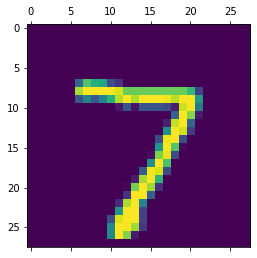

In [66]:
plt.matshow(X_test[0])

In [59]:
y_predicted = model_hm.predict(X_test_normalized)

313/313 [==============================] - 0s 903us/step


In [60]:
y_predicted[0]
# Displays the probability score for each class label. 

array([0.50638026, 0.3253736 , 0.47470847, 0.3386737 , 0.5770685 ,
       0.48061144, 0.24232325, 0.84105724, 0.48832527, 0.680114  ],
      dtype=float32)

In [61]:
np.argmax(y_predicted[0])

7

###### Confusion matrix

Convert the predicted probabilities into actual class labels to contruct confusion matrix

In [62]:
y_predicted[:5]

array([[0.50638026, 0.3253736 , 0.47470847, 0.3386737 , 0.5770685 ,
        0.48061144, 0.24232325, 0.84105724, 0.48832527, 0.680114  ],
       [0.44467   , 0.583153  , 0.5282321 , 0.5478958 , 0.27795923,
        0.6637704 , 0.5745435 , 0.14336735, 0.48996127, 0.19126593],
       [0.3949854 , 0.8135597 , 0.3972392 , 0.33593816, 0.37936446,
        0.37619352, 0.43067425, 0.4058005 , 0.4381879 , 0.4020853 ],
       [0.88177216, 0.2835794 , 0.46775436, 0.33284613, 0.39869043,
        0.6865951 , 0.6318692 , 0.4999731 , 0.65789366, 0.41035712],
       [0.5798247 , 0.18048368, 0.663126  , 0.39119807, 0.6519316 ,
        0.5205439 , 0.42115057, 0.6121032 , 0.56902856, 0.66671443]],
      dtype=float32)

In [63]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 5, 1, 0, 9]

In [64]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 909,    0,    6,    2,    3,   17,   32,    1,   10,    0],
       [   0, 1030,    6,    4,    1,   16,   12,    0,   63,    3],
       [  52,   46,  674,   77,    8,    5,   73,   17,   67,   13],
       [  28,   16,   74,  762,    2,   22,   28,   15,   42,   21],
       [   8,   17,    6,    5,  536,    7,   46,    8,   18,  331],
       [ 130,   34,    8,  167,   15,  367,   71,   25,   62,   13],
       [  45,   12,   14,    0,   12,   16,  839,    2,   12,    6],
       [  16,   59,   26,   14,   14,    2,    6,  761,   23,  107],
       [  26,   33,   32,  114,   23,   25,   24,   26,  619,   52],
       [  30,   28,   13,    9,   59,   11,    2,   97,   12,  748]])>

Plot this matrix

Text(69.0, 0.5, 'Truth')

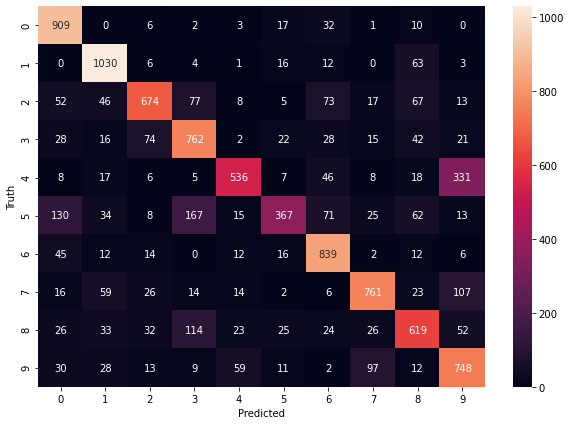

In [65]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')